# Real Polymers

[File as PDF](https://github.com/fcichos/SoftMatterPhysics/blob/669c5137e6e7f996dcdba31d56ba96e5394ec11c/source/notebooks/L22/1_real_polymers.pdf)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from scipy.constants import c,epsilon_0,e,k,physical_constants
import json

%config InlineBackend.figure_format = 'retina' 

with open('style.json', 'r') as fp:
    style = json.load(fp)
    
plt.rcParams.update(style) 

We want to look at properties of real polymers in the following, which means that we have to incorporate interactions between monomers, which are of finite size and also have interactions with the solvent. We will do that in a mean field model introducing the so-called Mayer f-function.

## Mayer f-function and excluded volume

Consider for that purpose the interaction by two monomers in a solvent with an effective potential $U(r)$. This potential typically has some large repulsive component at very short distances, some attractive components (negative) at intermediate length scales and a zero value at very large length scales. 

![Interaction](img/interaction.png)

### Interaction potential

The plots below show some example interaction potentials. The left graph displays the Lennard-Jones potential, the right one the hard sphere potential, which is also called an athermal potential, as there is no temperature in it due to the missing minimum. 

Note again, that this potential includes all effects of the solvent as well.

In [2]:
def LJ(eps,sig,r):
    return(4*eps*((sig/r)**12-(sig/r)**6))    

In [3]:
r=np.linspace(0.1,10,100)

In [5]:
fig=plt.figure(figsize=(10,5))
plt.ion()
plt.subplot(121)
plt.plot(r,LJ(1,3,r),'k--')
plt.ylim(-3,3)
plt.axhline(y=0)
plt.xlabel("distance r")
plt.ylabel(r"$U(r)$")
plt.subplot(122)
plt.plot([2,2],[0,3],'k--')
plt.axhline(y=0)
plt.plot([1,10],[0,0],'k--')
plt.ylim(-3,3)
plt.xlim(0)
plt.xlabel("distance r")
plt.ylabel(r"$U(r)$")
plt.tight_layout()
plt.savefig("img/tmp1.png")
plt.close(fig)

![tmp1](img/tmp1.png)

### Probability distribution

The probability distribution for finding the the monomers at a certain distance $r$ is then given by the Boltzman factor 

\begin{equation}
p(r)=\exp\left (-\frac{U(r)}{k_B T}\right)
\end{equation}

For the two potentials shown above, the probability therefore is zero wherever the potential is infinitely large. Whenever the potential is zero we find a probability density value of 1 while it is larger than 1 in the regions, where the potential is attractive. 

In [6]:
fig=plt.figure(figsize=(10,5))
plt.ion()
plt.subplot(121)
plt.plot(r,np.exp(-LJ(1,3,r)),'k--')
plt.ylim(-3,3)
plt.axhline(y=0)
plt.xlabel("distance r")
plt.ylabel(r"$p(r)$")
plt.subplot(122)
plt.plot(r,np.heaviside(r-2,1),'k--')
plt.axhline(y=0)
plt.plot([1,10],[0,0],'k--')
plt.ylim(-3,3)
plt.xlim(0,10)
plt.xlabel("distance r")
plt.ylabel(r"$p(r)$")
plt.tight_layout()
plt.savefig("img/tmp2.png")
plt.close(fig)

![tmp2](img/tmp2.png)

### Mayer f-function

The Mayer f-function measures now the deviation of the probability from the regions where the potential is zero or the probability density gives 1. It is defined by

\begin{equation}
f(r)=\exp\left (-\frac{U(r)}{k_B T}\right)-1 \tag{Mayer f-function}
\end{equation}

In [8]:
fig=plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(r,np.exp(-LJ(1,3,r))-1,'k--')
plt.ylim(-3,3)
plt.axhline(y=0)
plt.xlabel("distance r")
plt.ylabel(r"$f(r)$")
plt.subplot(122)
plt.plot(r,np.heaviside(r-2,1)-1,'k--')
plt.axhline(y=0)
plt.ylim(-3,3)
plt.xlim(0,10)
plt.xlabel("distance r")
plt.ylabel(r"$f(r)$")
plt.tight_layout()
plt.savefig("img/tmp3.png")
plt.close(fig)

![tmp3](img/tmp3.png)

This definition makes sense if we consider the right example of a hard sphere interaction. The free volume can then be calculated by 


\begin{equation}
v=-\int f(r)d^3r=\int \left[1-\exp\left (-\frac{U(r)}{k_B T}\right) \right]d^3r
\end{equation}

which is giving in the case of the hard sphere interaction just $4\pi R^3/3$, where R is the contact separation distance of the two spheres.
Thus the volume integral over the Mayer f-function is directly giving the excluded volume for the pairwise interaction. Note that the excluded volume can also be negative. This happens, when the attractive interaction is very strong. It can also be zero, when both positive and negative areas under the Mayer f-function are of the same size. 

### Polymer chain as a real gas

Our further calculations will now base the excluded volume influence on the conformation of a polymer chain under the assumtion that all monomers (or actually Kuhn segments) are independet and don't correlate in their position. They will thus behave like a real gas and show effect which we know from the **van der Waals gas**, such as co-volume and cohesive pressure. The two effects are actually corrections to the equation of state of the **ideal gas**, which can be written as

\begin{equation}
Z\equiv = \frac{pV_m}{R T}=1 \tag{compressibility factor}
\end{equation}

where $p$ is the pressure, $V_m$ the molar volume and $R$ is the gas constant, i.e. $R=k_B N_A$. For a real gas, the corrections have to scale with the density of the objects $\rho=1/V_m$ and we can write the compressibility factor as a Taylor series expansion

\begin{equation}
Z=\frac{pV_m}{R T}= 1+ B(T)\rho +C(T)\rho^2 + D(T)\rho^3+\ldots \tag{virial expansion}
\end{equation}

which is the viral expansion of the compressibility factor for a real gas. The coefficients $B(T),C(T),D(T)$ are called the viral expansion coefficient. 

Let's have a look at the first one in the case of a van der Waals gas, which is $B(T)$. The presure of a van der Waals gas reads

\begin{equation}
p=\frac{RT}{(V_m-b)}-\frac{a}{V_m^2}
\end{equation}

where $b$ denotes the co-volume (the volume taken by the molecules themselves) and $a$ amounts for the cohesive pressure of the gas molecules. If we set $a=0$ we can write the compressibility factor 

\begin{equation}
Z=\frac{PV_m}{RT}=\frac{1}{1-\frac{b}{V_m}}
\end{equation}


For $b/V_m<1$, we can do a Taylor expansion which yields

\begin{equation}
Z=1+b\frac{1}{V_m}+b^2\frac{1}{V_m^2}+\ldots=1+b\rho +b^2 \rho^2 + \ldots
\end{equation}

Comparing with the virial expansion above yields the fact that the virial expansion coefficient 

$$
B(T)=b
$$

where b was the molar co-volume in the van der Waals equation, e.g. the excluded volume. Correspondingly, the virial expansion coefficient is given by the integral over the Mayer f-function, i.e. in spherical coordinates


$$
B(T)=-\int f(r)d^3r=-4 \pi \int_{0}^{\infty}\left(e^{-\frac{U(r)}{k_B T}}-1\right) r^{2} d^3r
$$

Using this relation, we have a way to introduce the monomer-monomer and monomer-solvent interaction that is hidden in the May f-function into the equation of state of a real gas of polymer segements. We will come back to this solution.


## Non-spherical segments and Free energy of interaction of a real chain

While we have assumed so far (without emphasizing it to much) that the interaction of the monomers is radially symmetric (monomers are spheres), typical monomers are rather rod-like. Thus we should get an idea about how the free volume changes when we go from a sphere to the rod. The procedure below considers the free energy of the interaction and replaces a rod by a set of spheres. 
We can get an idea about the free energy of a chain by coming back to our osmotic pressure formula

\begin{equation}
\Pi=n k_B T
\end{equation}

where $n$ is the number density of molecules. The unit of pressure is $N/m^2$ or $J/m^3$, which is an energy density. The formula above tells us that adding a single molecule comes at some cost, which is $k_B T$. Yet, this is an ideal gas consideration. 
If we want to add a contribution of the excluded volume, we can refer to the overlap fraction

$$
\Phi^*=b^3 \frac{N}{R^3}
$$

where $b$ was the Kuhn length and $R$ the root mean squared end-to-end distance. The number of monomer-monomer contacts was $N\Phi^*$, which finally gives $N^2/R^6$ contacts per volume. 
The free energy of interaction per volume is therefore 

\begin{equation}
\frac{F_{\rm int}}{V}=k_B T(vc_m^2 + w c_m^3+\ldots)=k_B T (v\frac{N^2}{R^6}+w\frac{N^3}{R^9}+\ldots)
\end{equation}

where $c_m=N/R^3$ is the monomer concentration. The first term in the above equation results from the monomer-monomer contacts as we introduced. The second term is accordingly the result of the contact between three monomers and so on. Therefore, this is also a virial expansion and the first virial expansion coefficient $v$ is the excluded volume of the bimolecular monomer contact.

This consideration helps us to understand the role of non-spherical rodlike monomers or segments. If we have a rodlike segment of length $b$ and radius $d$, then the rod can be replaced by spherical monomers of radius $d$. The number of spherical monomers per segment is then $b/d$. Thus if a chain has $N$ rodlike segments, then it can be replaced by $n=Nb/d$ spherical monomers.

In case of hard-sphere interactions the overall contribution of the excluded volume to the free energy shall be independent of the fact if the rods are replaced by spheres so the term

$$
vN^2/R^6
$$

shall give the same results, and therefore

$$
v_s n^2 = v_c N^2
$$

or

$$
w_sn^3=w_c N^3
$$

With the spherical volume $v_s=d^3$ and $w_s=d^6$ we find

$$
v_c=v_s\left (\frac{n}{N}\right )^2=v_s\left(\frac{b}{d} \right )^2=b^2 d
$$

Thus the excluded volume for the interaction of two rods is larger than the actual rod volume itself, which is 

$$
v_0=bd^2
$$

which is the result of random orientations. If the aspect ratio, i.e. the ratio of the two volumes $v_c/v_0$ is large, this excess excluded volume is the driving force for a nematic (aligment) ordering of the rodlike segments as originally described by Onsager for liquid crystalline systems.

## Solvent Classification


- **Athermal Solvents** Here, $v$ is independent of temperature. The system only features hard core repulsion and $v ≈ b^2d$. Monomer-monomer contact is energetically indistinguishable from monomer-solvent contact, for example.

- **Good solvents** Excluded volume is reduced due to monomer-monomer attraction. The effect of this attraction is greater at lower temperatures, causing a reduction in the excluded volume. $0 < v < b^2d$

- **Theta solvent** The (positive) contribution to excluded volume from hard core repulsion is exactly balanced by that (negative) due to attractions and so $v = 0$. The chains thus have nearly ideal conformations. This occurs at a temperature called the theta temperature,$Θ$, which is analogous to the Boyle temperature in thermodynamics.

- **Poor solvents** Excluded volume is negative due to large attractive interactions between the monomers, which prefer monomer-monomer contact strongly over monomer-solvent contact. Chain dimensions are reduced relative to ideal. $−b^2d < v < 0$.

- **Non-solvents** Here, $v ≈ −b^2d$ and the polymer collapses into a very compact structure that excludes all solvent.


## Flory theory (in a good solvent)

Flory treated the question of equilibrium conformation of real chains using a mean field approach. The equilibrium size is set by a balance between excluded volume which tends to expand the chain size, and a restoring force due to loss of conformational entropy due to swelling. The energetic contribution due to excluded volume is given by the number of excluded volume interactions within a coil and the cost of each exclusion, $k_B T$. The number of excluded volume interactions is just the probability of finding a monomer within the excluded volume of another. If we assume a mean density of monomers in the coil, $N/R^3$, then the number of excluded volume interactions per monomer is $vN/R^3$ and for $N$ monomers in the coil, the energetic contribution is

$$
F_{\text {int }} \approx k_B T v \frac{N^{2}}{R^{3}}
$$

The entropic energy due to expansion of the coil is, as we have calculated before, given as 


$$
F_{\text {entropic }} \approx k_B T \frac{R^{2}}{N b^{2}}
$$


which gives a total free energy

$$
F \approx k_B T\left(v \frac{N^{2}}{R^{3}}+\frac{R^{2}}{N b^{2}}\right)
$$

In [50]:
def F(R):
    T=293.15
    v=10
    b=0.5
    N=3
    return k*T*(v*N**2/R**3+R**2/(N*b**2))

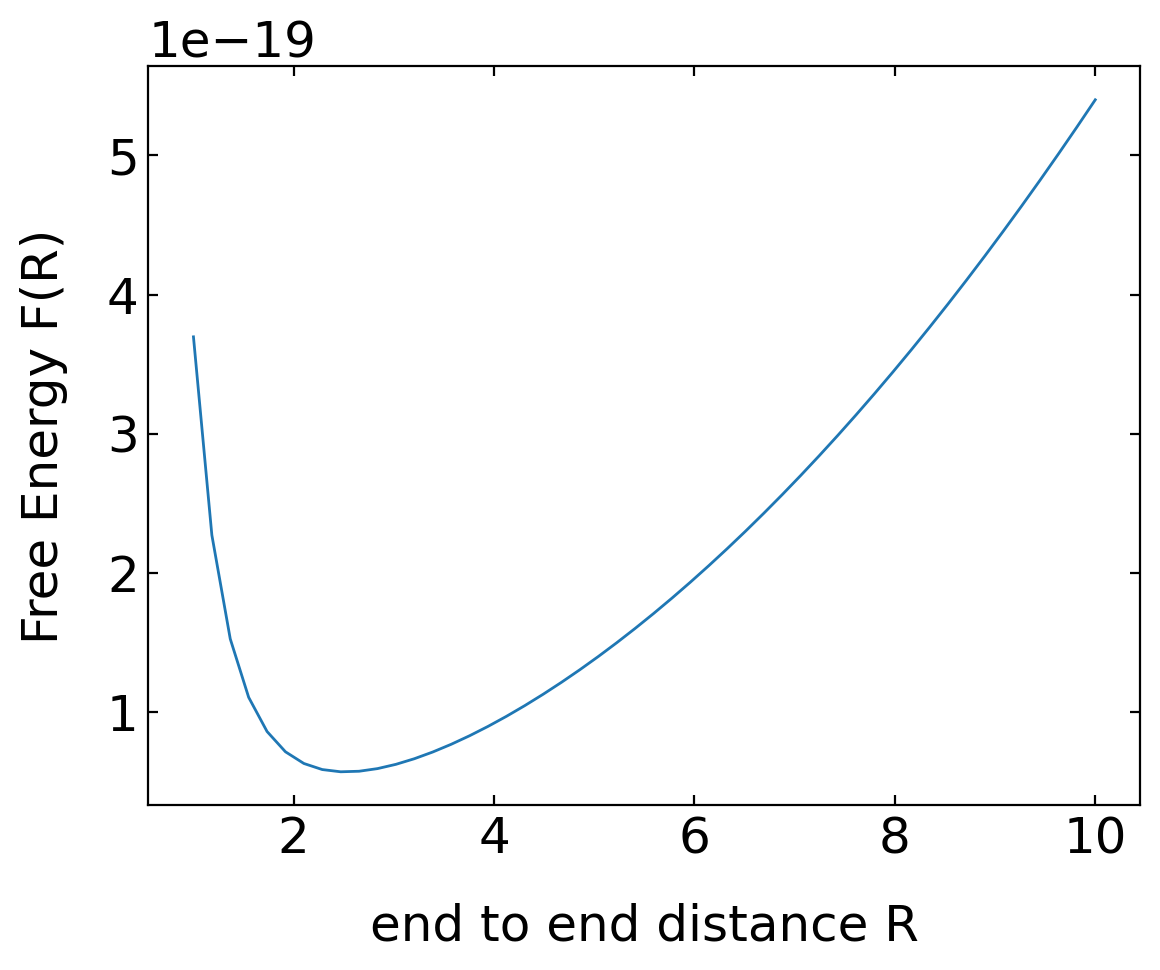

In [51]:
R=np.linspace(1, 10)
plt.plot(R, F(R))
plt.xlabel("end to end distance R")
plt.ylabel("Free Energy F(R)")
plt.show()

The total free enery as a function of the end to end distance $R$ has two components which either decay with $R^{-3}$ or increase with $R^2$. Therefore this function has a minimum, i.e.

$$
\frac{\partial F}{ \partial R}\bigg |_{R_{F}}=0
$$

at a particular end to end distance, which is the so-called Flory radius $R_F$. From the derivative we find

$$
R_{F} \approx v^{1 / 5} b^{2 / 5} N^{3 / 5}
$$

which shows, that the size of a real polymer chain scales with $N^{3 / 5}$, where $\nu=3/5=0.6$ is the Flory exponent, which has to be compared to $\nu=1/2$ for an ideal (Gaussian chain). The polymer size thus scales stronger with the number of segments in the polymer, which seems at first glance a small difference, but due to the large numbers involved for $N$, this could make quite some difference. 

**insert experimental plot here**

The simple approach taken by Flory provides surprisingly good results - more modern theories/calculations provide $R ∼ N^{0.588}$. However, the success of the Flory theory is due to a cancelation of errors. The excluded volume contributions are overestimated as correlations between monomers (which decrease the probability of overlap) are not considered. At the same time, the entropic restoring force is also overestimated. Nevertheless, such approaches based on a mean field approximation of density combined with ideal chain conformation-derived entropy can provide quite useful results, for example in the case of an adsorbed chain.
The treatment of the case for $v < 0$ in the preceding simple manner leads to an aphysical result for the coil size that minimizes the total free energy. Stabilizing terms need to be considered.

## Flory Theory (in all solvents)

To extend the Flory theory for all kinds of solvents you have to go back to the virial expansion of the free energy density.

$$
\frac{F_{int}}{V k_B T}=F_{0}+ vc^2+ wc^3+\ldots
$$

which essentially contains a contribution of the ideal chain, plus the corrections in orders of the segment density $c$. The ideal chain therby contributes the entropic part and the real chain correction gives the free volume correction. The main difference now to the good solvent model is that the entropic part above has to include some additional term to include a repulsive Term

$$
F_{\text {entropic }} \approx k_B T \frac{R^{2}}{N b^{2}}+ \underbrace{\frac{Nb^2}{R^2}}_{\rm new\, term}
$$

In this way, the free energy is

$$
\frac{F}{k_BT}=\frac{R^2}{Nb^2}+\frac{Nb^2}{R}+v \frac{N^2}{R^3}+w \frac{N^3}{R^6}+\ldots
$$

Defining now the ratio of the end to end distance of the real chain and the ideal chain gives

$$
\alpha^2=\frac{\langle R^2\rangle}{\langle R^2\rangle_0=\frac{R^2}{Nb^2}}
$$

results in 

$$
\frac{F}{k_B T}=\alpha^2+\alpha^{-2}+ \frac{vN^{1/2}}{b^3}\alpha^{-3}+\frac{w}{b^6}\alpha^{-6}
$$

This allows us to see that for

- $\alpha \gg 1$ we have a good solvent with $R_F\propto N^{3/5}$ and an extended polymer conformation
- $\alpha \ll 1$ we find $R_F\propto N^{1/3}$ with a collapsed polymer

## Temperature dependence of the chain size

Using the Mayer f-function we can now also write down some basic ideas about the temperature dependence of the chain size. This is essentially hidden in the Boltzman factor including the potential energy $U(r)$.

If this potential energy is much bigger than the thermal eneryg, i.e. $U(r)\gg k_B T$, then we are commonly at small distances $r<b$ in the repulsive region. In this region, we can reduce the Mayer f-function to 

$$
f(r)=\exp\left ( \frac{U(r)}{k_B T}\right)-1 \approx -1
$$

essentially to $-1$.

If, on the other side the distance is larger than the Kuhn length ($r>b$), the interaction potential is small as compared to $k_B T$ and we may write

$$
f(r)=\exp\left ( \frac{U(r)}{k_B T}\right)-1 \approx -\frac{U(r)}{k_B T}
$$

Following these approximation we may split the intergral, which yields the excluded volume into two parts

$$
v=-4\pi \int_0^{\infty}f(r)r^2 dr\approx 4\pi \int_0^{b}r^2 dr+\frac{4\pi}{k_B T}\int_b^{\infty}U(r)r^2dr
$$

This gives two terms, one the voume of the hard core repulsion and the second a term which comprises all the temperature dependent interaction. The dependencies can then be written as

$$
v\approx \left ( 1-\frac{\theta}{T}\right ) b^3
$$

where $\theta$ is the theta temperature, which is defined as

$$
\theta\approx -\frac{1}{b^3 k_B}\int_B^{\infty}U(r) r^{2}dr
$$

According to this simplified formula for the excluded volume we see now the individual effects of solvent

- $T<\theta$ means the free volume is negative and we are in a **poor solvent**
- $T=\theta$ means that we have $v=0$, and we are in a $\theta$-solvent
- $T>\theta$ means that we have $v>0$ and a **swelling** (growth) of the polymer
- $T\gg\theta$ means we are in the **athermal** situation such that $v=b^{3}$



**display experimental graph from Colby**